In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.preprocessing import RobustScaler
pd.set_option('display.max_columns', None)
unfiltered_data=pd.read_csv('../raw_data/cleaned_data_040321.csv',encoding='latin-1')


/home/lpshruthi/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (55,56,57,58,59,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
t=pd.read_csv('../raw_data/cleaned_data_040321.csv',encoding='latin-1')

In [7]:
unfiltered_data.shape


(125306, 154)

In [110]:
## Sex

In [13]:
ohe_sex = OneHotEncoder(sparse = False)
ohe_sex.fit(unfiltered_data[['Dem_gender']]) 


OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [8]:
ohe_sex.categories_


[array(['Female', 'Male', 'Other/would rather not say'], dtype=object)]

In [16]:
unfiltered_data[['Female','Male','Other']]= ohe_sex.transform(unfiltered_data[['Dem_gender']])

In [17]:
unfiltered_data.drop(columns='Dem_gender',inplace=True)

In [ ]:
##############  Dem_edu

In [18]:
unfiltered_data['Dem_edu'] = unfiltered_data['Dem_edu'].replace({'Uninformative response':0,'None':1,'Up to 6 years of school':2, 'Up to 9 years of school':3, 'Up to 12 years of school':4, 'Some College, short continuing education or equivalent':5, 'College degree, bachelor, master': 6, 'PhD/Doctorate':7 })

In [ ]:
##############  Dem_edu_mom

In [12]:
unfiltered_data['Dem_edu_mom'].value_counts()

College degree                13415
Up to 12 years of school      10916
Some College or equivalent     8132
Up to 9 years of school        5586
Up to 6 years of school        3782
None                           2284
PhD/Doctorate                  1365
Uninformative response            9
Name: Dem_edu_mom, dtype: int64

In [19]:
unfiltered_data['Dem_edu_mom'] = unfiltered_data['Dem_edu_mom'].replace({'Uninformative response':0,'None':1,'Up to 6 years of school':2, 'Up to 9 years of school':3, 'Up to 12 years of school':4, 'Some College or equivalent':5, 'College degree': 6, 'PhD/Doctorate':7 })

In [ ]:
### Dem_riskgroup

In [20]:
unfiltered_data['Dem_riskgroup'] = unfiltered_data['Dem_riskgroup'].replace({'No':1,'Not sure':2, 'Yes':3})

In [10]:
## Dem_maritalstatus

In [21]:
ohe_marital = OneHotEncoder(sparse = False)
ohe_marital.fit(unfiltered_data[['Dem_maritalstatus']]) 
ohe_marital.categories_

[array(['Divorced/widowed', 'Married/cohabiting',
        'Other or would rather not say', 'Single',
        'Uninformative response'], dtype=object)]

In [65]:
#unfiltered_data[['Divorced/widowed','Married/cohabiting','Other or would rather not say','Single']]= ohe_marital.transform(unfiltered_data[['Dem_maritalstatus']])

# CHECK 

In [22]:
#check wit someone:
unfiltered_data[['Divorced/widowed','Married/cohabiting','Other or would rather not say','Single','Uninformative response']]= ohe_marital.transform(unfiltered_data[['Dem_maritalstatus']])

In [23]:
unfiltered_data.drop(columns='Dem_maritalstatus',inplace=True)

In [ ]:
##### Dem_Expat

In [24]:
unfiltered_data['Dem_Expat'] = unfiltered_data['Dem_Expat'].replace({'no':0,'yes':1})

In [ ]:
##### Dem_isolation

In [25]:
ohe_isolation = OneHotEncoder(sparse = False)
ohe_isolation.fit(unfiltered_data[['Dem_isolation']]) 
ohe_isolation.categories_

[array(['1', 'Isolated',
        'Isolated in medical facility of similar location',
        'Life carries on as usual', 'Life carries on with minor changes'],
       dtype=object)]

In [26]:
unfiltered_data[['no opinion','Isolated','Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes']]= ohe_isolation.transform(unfiltered_data[['Dem_isolation']])

In [27]:
unfiltered_data.drop(columns='Dem_isolation',inplace=True)

In [52]:
## Dem_employement

In [28]:
ohe_employment = OneHotEncoder(sparse = False)
ohe_employment.fit(unfiltered_data[['Dem_employment']]) 
ohe_employment.categories_

[array(['Full time employed', 'Not employed', 'Part time employed',
        'Retired', 'Self-employed', 'Student'], dtype=object)]

In [29]:
unfiltered_data[['Full time employed','Not employed','Part time employed','Retired','Self-employed','Student']]= ohe_employment.transform(unfiltered_data[['Dem_employment']])

In [30]:
unfiltered_data.drop(columns='Dem_employment',inplace=True)

In [25]:
unfiltered_data.columns

Index(['Unnamed: 0', 'UserLanguage', 'Dem_age', 'Dem_edu', 'Dem_edu_mom',
       'Country', 'Dem_Expat', 'Dem_dependents', 'Dem_riskgroup',
       'Dem_isolation_adults',
       ...
       'Isolated', 'Isolated in medical facility of similar location',
       'Life carries on as usual', 'Life carries on with minor changes',
       'Full time employed', 'Not employed', 'Part time employed', 'Retired',
       'Self-employed', 'Student'],
      dtype='object', length=141)

In [31]:
unfiltered_data.drop(columns=['Unnamed: 0','UserLanguage'],inplace=True)

In [ ]:
# not scaled (new_Df)

In [32]:
new_df=unfiltered_data.drop(columns=['Country','Dem_isolation_adults','Dem_isolation_kids'])

In [28]:
from sklearn.preprocessing import RobustScaler


In [33]:
new_df.to_csv('preprocessed.csv')

In [ ]:
### all columns scaled  (Df)

In [512]:
#from sklearn.preprocessing import MinMaxScaler

#r_scaler = MinMaxScaler()
#r_scaler.fit(new_df)
#new_df_np=r_scaler.transform(new_df)
#df = pd.DataFrame(data=new_df_np)
#df.columns = new_df.columns

In [34]:
new_df

,Dem_age,Dem_edu,Dem_edu_mom,Dem_Expat,Dem_dependents,Dem_riskgroup,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Corona_concerns_1,Corona_concerns_2,Corona_concerns_3,Corona_concerns_4,Corona_concerns_5,Trust_countrymeasure,Compliance_1,Compliance_2,Compliance_3,Compliance_4,Compliance_5,Compliance_6,BFF_15_1,BFF_15_2,BFF_15_3,BFF_15_4,BFF_15_5,BFF_15_6,BFF_15_7,BFF_15_8,BFF_15_9,BFF_15_10,BFF_15_11,BFF_15_12,BFF_15_13,BFF_15_14,BFF_15_15,Expl_Distress_1,Expl_Distress_2,Expl_Distress_3,Expl_Distress_4,Expl_Distress_5,Expl_Distress_6,Expl_Distress_7,Expl_Distress_8,Expl_Distress_9,Expl_Distress_10,Expl_Distress_11,Expl_Distress_12,Expl_Distress_13,Expl_Distress_14,Expl_Distress_15,Expl_Distress_16,Expl_Distress_17,Expl_Distress_18,Expl_Distress_19,Expl_Distress_20,Expl_Distress_21,Expl_Distress_22,Expl_Distress_23,Expl_Distress_24,SPS_1,SPS_2,SPS_3,SPS_4,SPS_5,SPS_6,SPS_7,SPS_8,SPS_9,SPS_10,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg,Female,Male,Other,Divorced/widowed,Married/cohabiting,Other or would rather not say,Single,Uninformative response,no opinion,Isolated,Isolated in medical facility of similar location,Life carries on as usual,Life carries on with minor changes,Full time employed,Not employed,Part time employed,Retired,Self-employed,Student
0,20,6,1,1,0.0,3,3.0,3.0,1.0,5.0,2.0,3.0,4.0,4.0,2.0,1.0,3.0,1.0,3.0,3.0,10.0,5.0,4.0,4.0,2.0,4.0,5.0,1.0,2.0,4.0,4.0,5.0,5.0,6.0,3.0,3.0,2.0,4.0,2.0,2.0,2.0,5.0,5.0,5.0,2.0,5.0,6.0,5.0,2.0,4.0,6.0,5.0,2.0,5.0,6.0,5.0,99.0,4.0,5.0,4.0,6.0,99.0,99.0,99.0,99.0,1.0,1.0,4.0,5.0,5.0,5.0,4.0,4.0,1.0,2.0,2.0,4.0,99.0,5.0,4.0,5.0,6.0,6.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,2.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0,1.0,2.0,3.0,4.0,2.0,3.0,2.2,2.333333,2.000000,5.000000,5.333333,5.000000,5.000000,5.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,68,6,6,0,0.0,1,1.0,2.0,3.0,4.0,4.0,2.0,4.0,4.0,2.0,3.0,2.0,2.0,3.0,7.0,7.0,7.0,7.0,8.0,8.0,7.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,1.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,99.0,2.0,99.0,5.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,4.0,2.0,2.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.1,2.333333,3.333333,3.666667,4.333333,4.000000,3.666667,5.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,29,5,5,0,1.0,3,2.0,2.0,3.0,4.0,3.0,3.0,5.0,3.0,2.0,2.0,4.0,1.0,3.0,6.0,7.0,3.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,99.0,5.0,2.0,5.0,3.0,99.0,2.0,5.0,2.0,4.0,2.0,4.0,5.0,99.0,2.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,5.0,4.0,4.0,2.0,5.0,2.0,2.3,2.666667,3.666667,3.666667,5.000000,4.666667,4.666667,4.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,38,4,4,0,1.0,3,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,5.0,7.0,3.0,5.0,4.0,3.0,4.0,6.0,4.0,4.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,2.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,2.0,2.0,5.0,5.0,4.0,5.0,5.0,4.0,99.0,5.0,5.0,2.0,2.0,5.0,99.0,4.0,5.0,5.0,5.0,3.0,99.0,2.0,2.0,2.0,2.0,5.0,4.0,5.0,3.0,2.0,6.0,5.0,5.0,6.0,6.0,5.0,5.0,6.0,5.0,5.0,4.0,5.0,2.0,2.0

(array([2.1095e+04, 2.0909e+04, 1.7383e+04, 1.3001e+04, 8.3060e+03,
        4.1070e+03, 6.4100e+02, 4.4000e+01, 1.0000e+00, 2.0000e+00]),
 array([ 18. ,  27.2,  36.4,  45.6,  54.8,  64. ,  73.2,  82.4,  91.6,
        100.8, 110. ]),
 <BarContainer object of 10 artists>)

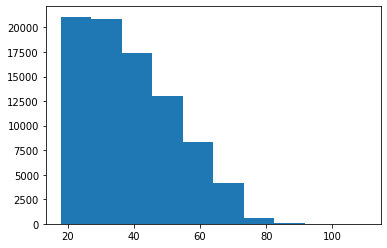

In [182]:
import matplotlib.pyplot as plt
plt.hist(new_df['Dem_age'])

In [161]:
unfiltered_data.head(5)

,Dem_age,Dem_edu,Dem_edu_mom,Country,Dem_Expat,Dem_dependents,Dem_riskgroup,Dem_isolation_adults,Dem_isolation_kids,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Corona_concerns_1,Corona_concerns_2,Corona_concerns_3,Corona_concerns_4,Corona_concerns_5,Trust_countrymeasure,Compliance_1,Compliance_2,Compliance_3,Compliance_4,Compliance_5,Compliance_6,BFF_15_1,BFF_15_2,BFF_15_3,BFF_15_4,BFF_15_5,BFF_15_6,BFF_15_7,BFF_15_8,BFF_15_9,BFF_15_10,BFF_15_11,BFF_15_12,BFF_15_13,BFF_15_14,BFF_15_15,Expl_Distress_1,Expl_Distress_2,Expl_Distress_3,Expl_Distress_4,Expl_Distress_5,Expl_Distress_6,Expl_Distress_7,Expl_Distress_8,Expl_Distress_9,Expl_Distress_10,Expl_Distress_11,Expl_Distress_12,Expl_Distress_13,Expl_Distress_14,Expl_Distress_15,Expl_Distress_16,Expl_Distress_17,Expl_Distress_18,Expl_Distress_19,Expl_Distress_20,Expl_Distress_21,Expl_Distress_22,Expl_Distress_23,Expl_Distress_24,SPS_1,SPS_2,SPS_3,SPS_4,SPS_5,SPS_6,SPS_7,SPS_8,SPS_9,SPS_10,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg,Female,Male,Other,Divorced/widowed,Married/cohabiting,Other or would rather not say,Single,Uninformative response,no opinion,Isolated,Isolated in medical facility of similar location,Life carries on as usual,Life carries on with minor changes,Full time employed,Not employed,Part time employed,Retired,Self-employed,Student
0,20,6,1,Pakistan,1,0.0,3,missing,missing,3.0,3.0,1.0,5.0,2.0,3.0,4.0,4.0,2.0,1.0,3.0,1.0,3.0,3.0,10.0,5.0,4.0,4.0,2.0,4.0,5.0,1.0,2.0,4.0,4.0,5.0,5.0,6.0,3.0,3.0,2.0,4.0,2.0,2.0,2.0,5.0,5.0,5.0,2.0,5.0,6.0,5.0,2.0,4.0,6.0,5.0,2.0,5.0,6.0,5.0,99.0,4.0,5.0,4.0,6.0,99.0,99.0,99.0,99.0,1.0,1.0,4.0,5.0,5.0,5.0,4.0,4.0,1.0,2.0,2.0,4.0,99.0,5.0,4.0,5.0,6.0,6.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,2.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0,1.0,2.0,3.0,4.0,2.0,3.0,2.2,2.333333,2.000000,5.000000,5.333333,5.000000,5.000000,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,68,6,6,Italy,0,0.0,1,1.0,0.0,1.0,2.0,3.0,4.0,4.0,2.0,4.0,4.0,2.0,3.0,2.0,2.0,3.0,7.0,7.0,7.0,7.0,8.0,8.0,7.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,1.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,99.0,2.0,99.0,5.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,4.0,2.0,2.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.1,2.333333,3.333333,3.666667,4.333333,4.000000,3.666667,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,29,5,5,Argentina,0,1.0,3,0.0,1.0,2.0,2.0,3.0,4.0,3.0,3.0,5.0,3.0,2.0,2.0,4.0,1.0,3.0,6.0,7.0,3.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,99.0,5.0,2.0,5.0,3.0,99.0,2.0,5.0,2.0,4.0,2.0,4.0,5.0,99.0,2.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,5.0,4.0,4.0,2.0,5.0,2.0,2.3,2.666667,3.666667,3.666667,5.000000,4.666667,4.666667,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,38,4,4,Argentina,0,1.0,3,1.0,0.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,5.0,7.0,3.0,5.0,4.0,3.0,4.0,6.0,4.0,4.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,2.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,2.0,2.0,5.0,5.0,4.0,5.0,5.0,4.0,99.0,5.0,5.0,2.0,2.0,5.0,99.0,4.0,5.0,

## knn 

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
# decide X and y 
y=new_df[['neu','ext','ope','agr','con']]
X=new_df.loc[:,'BFF_15_1':'BFF_15_15']



NameError: name 'new_df' is not defined

In [135]:
knn=KNeighborsRegressor(n_neighbors=15)

In [318]:
predictions=cross_val_predict(knn,X,y,cv=5)

In [325]:
predictions

array([[2.0222222 , 4.95555556, 5.17777773, 4.93333333, 5.0222222 ],
       [3.37777778, 3.62222222, 4.24444444, 3.97777778, 3.71111111],
       [3.57777776, 3.8222222 , 5.        , 4.73333336, 4.71111113],
       ...,
       [4.55555556, 2.93333333, 4.77777778, 4.02222222, 3.55555556],
       [1.28888889, 2.6       , 3.53333333, 5.35555556, 5.33333333],
       [4.04444444, 2.68888889, 4.26666667, 3.28888889, 3.84444444]])

In [327]:
new_df[['neu_pred','ext_pred','ope_pred','agr_pred','con_pred']]=predictions

In [311]:
knn.fit(X_train,y_train)

In [272]:
X_train.shape

(68391, 15)

In [273]:
X_test.shape

(17098, 15)

In [313]:
y_pred=knn.predict(X_test)


In [314]:
# cross val predict 
y_pred

array([[3.13333329, 2.13333331, 4.71111109, 4.00000007, 4.02222224],
       [2.13333333, 4.26666667, 4.91111109, 3.28888887, 4.15555553],
       [4.08888887, 3.39999998, 4.88888896, 3.79999998, 3.5777778 ],
       ...,
       [2.64444442, 3.82222224, 5.04444444, 4.46666664, 3.86666664],
       [2.71111109, 3.33333331, 4.3777778 , 4.44444442, 5.11111111],
       [2.53333333, 5.8       , 5.17777778, 4.51111111, 5.68888889]])

In [2]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

NameError: name 'y_test' is not defined

In [316]:
knn.score(X_test,y_test)

/home/lpshruthi/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "


0.9539845717163928

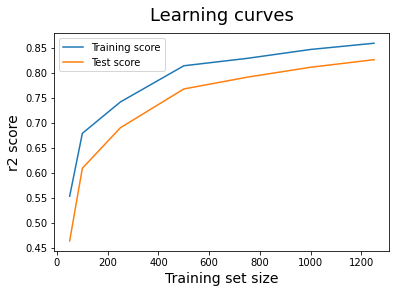

In [193]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=15),
                                                              X = X, 
                                                              y = y, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

# predicting the loneliness level

In [136]:
for i in new_df.columns:
    print(i)

Dem_age
Dem_edu
Dem_edu_mom
Dem_Expat
Dem_dependents
Dem_riskgroup
Scale_PSS10_UCLA_1
Scale_PSS10_UCLA_2
Scale_PSS10_UCLA_3
Scale_PSS10_UCLA_4
Scale_PSS10_UCLA_5
Scale_PSS10_UCLA_6
Scale_PSS10_UCLA_7
Scale_PSS10_UCLA_8
Scale_PSS10_UCLA_9
Scale_PSS10_UCLA_10
Scale_SLON_1
Scale_SLON_2
Scale_SLON_3
OECD_people_1
OECD_people_2
OECD_insititutions_1
OECD_insititutions_2
OECD_insititutions_3
OECD_insititutions_4
OECD_insititutions_5
OECD_insititutions_6
Corona_concerns_1
Corona_concerns_2
Corona_concerns_3
Corona_concerns_4
Corona_concerns_5
Trust_countrymeasure
Compliance_1
Compliance_2
Compliance_3
Compliance_4
Compliance_5
Compliance_6
BFF_15_1
BFF_15_2
BFF_15_3
BFF_15_4
BFF_15_5
BFF_15_6
BFF_15_7
BFF_15_8
BFF_15_9
BFF_15_10
BFF_15_11
BFF_15_12
BFF_15_13
BFF_15_14
BFF_15_15
Expl_Distress_1
Expl_Distress_2
Expl_Distress_3
Expl_Distress_4
Expl_Distress_5
Expl_Distress_6
Expl_Distress_7
Expl_Distress_8
Expl_Distress_9
Expl_Distress_10
Expl_Distress_11
Expl_Distress_12
Expl_Distress_13
Expl_Di

# SELECT FEATURES 

In [29]:
y=new_df['SLON3_avg']

In [387]:
X.shape

(45489, 28)

In [30]:
X_features = new_df[[
                    'BFF_15_1','BFF_15_2','BFF_15_3','BFF_15_4','BFF_15_5','BFF_15_6','BFF_15_7','BFF_15_8','BFF_15_9','BFF_15_10','BFF_15_11',
           'BFF_15_12','BFF_15_13','BFF_15_14','BFF_15_15',
            "Dem_age","Dem_edu","Dem_riskgroup",'Female','Male','Other','Divorced/widowed',
            'Married/cohabiting','Other or would rather not say','Single','Uninformative response','no opinion','Isolated',
            'Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes',
            'Full time employed','Not employed','Part time employed','Retired','Self-employed','neu','ext','ope','agr','con']].reset_index(drop=True)

In [301]:
#X=new_df.drop(columns=['SLON3_avg','Scale_SLON_1','Scale_SLON_2','Scale_SLON_3','Scale_PSS10_UCLA_1','Scale_PSS10_UCLA_2','Scale_PSS10_UCLA_3','Scale_PSS10_UCLA_4','Scale_PSS10_UCLA_5','Scale_PSS10_UCLA_6','Scale_PSS10_UCLA_7','Scale_PSS10_UCLA_8','Scale_PSS10_UCLA_9','Scale_PSS10_UCLA_10'])

In [464]:
corr = X_features.corr()

corr_df = corr.unstack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[(corr_df['correlation'] >= 0.1)]

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df[corr_df['feature_1']=='SLON3_avg']



,feature_1,feature_2,correlation


# MODELLING

In [206]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [207]:
X = new_df[[
                    'BFF_15_1','BFF_15_2','BFF_15_3','BFF_15_4','BFF_15_5','BFF_15_6','BFF_15_7','BFF_15_8','BFF_15_9','BFF_15_10','BFF_15_11',
           'BFF_15_12','BFF_15_13','BFF_15_14','BFF_15_15',
            "Dem_age","Dem_edu","Dem_riskgroup",'Female','Male','Other','Divorced/widowed',
            'Married/cohabiting','Other or would rather not say','Single','Uninformative response','no opinion','Isolated',
            'Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes',
            'Full time employed','Not employed','Part time employed','Retired','Self-employed','neu','ext','ope','agr','con']].reset_index(drop=True)

In [227]:
new_df['SLON3_avg_category']=pd.cut(new_df['SLON3_avg'],bins=5,labels=['0','1','2','3','4'])

In [229]:
y=new_df['SLON3_avg_category']
y=np.array(y)
set(y)

{'0', '1', '2', '3', '4'}

In [241]:
new_df['SLON3_avg_category']

16155    2
39793    2
73123    2
82217    2
2388     0
        ..
13236    4
51064    0
53712    3
25729    3
77317    0
Name: SLON3_avg_category, Length: 45489, dtype: category
Categories (5, object): ['0' < '1' < '2' < '3' < '4']

In [230]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

y_cat=to_categorical(y, num_classes=5)
y_cat.shape

(45489, 5)

In [231]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_cat,test_size=0.30,random_state=0)

In [232]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [233]:
X_train.shape

(31842, 41)

In [203]:
y_train.shape

(31842, 5)

In [237]:
def initialize_model():
    
    ### Model architecture
    # To complete
    # To complete
    # To complete
    model=Sequential()
    model.add(layers.Dense(50,activation='relu',input_dim=41))
    model.add(layers.Dense(50,activation='relu'))
    model.add(layers.Dense(5,activation='softmax'))
    
    
    ### Model optimization : Optimizer, loss and metric 
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model 

### Note here that the loss is different!
### This is because the task is not with two categories only, therefore
### the solver is somehow different (will see it tomorrow)

model = initialize_model()

In [205]:
set(y)

{0, 1}

In [238]:

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=8,
                    verbose=1,validation_split=0.2)

Epoch 1/50
3185/3185 [==============================] - 8s 2ms/step - loss: 1.4701 - accuracy: 0.3327 - val_loss: 1.4276 - val_accuracy: 0.3676
Epoch 2/50
3185/3185 [==============================] - 7s 2ms/step - loss: 1.4133 - accuracy: 0.3646 - val_loss: 1.4131 - val_accuracy: 0.3694
Epoch 3/50
3185/3185 [==============================] - 8s 2ms/step - loss: 1.3953 - accuracy: 0.3690 - val_loss: 1.4131 - val_accuracy: 0.3705
Epoch 4/50
3185/3185 [==============================] - 7s 2ms/step - loss: 1.3934 - accuracy: 0.3798 - val_loss: 1.4145 - val_accuracy: 0.3655
Epoch 5/50
3185/3185 [==============================] - 7s 2ms/step - loss: 1.3795 - accuracy: 0.3875 - val_loss: 1.4253 - val_accuracy: 0.3599
Epoch 6/50
3185/3185 [==============================] - 7s 2ms/step - loss: 1.3770 - accuracy: 0.3888 - val_loss: 1.4228 - val_accuracy: 0.3649
Epoch 7/50
3185/3185 [==============================] - 7s 2ms/step - loss: 1.3714 - accuracy: 0.3919 - val_loss: 1.4262 - val_accuracy:

# Classifier

In [174]:
new_df['SLON3_avg']

16155    3.333333
39793    2.666667
73123    3.000000
82217    2.666667
2388     1.333333
           ...   
13236    4.333333
51064    1.666667
53712    3.666667
25729    4.000000
77317    1.666667
Name: SLON3_avg, Length: 45489, dtype: float64

In [180]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [176]:
check_cond=lambda x : 1 if x >= 4  else 0
   
new_df['SLON3_avg_category']=new_df['SLON3_avg'].map(check_cond)

In [181]:
y=new_df['SLON3_avg_category']

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
X_features = new_df[[
                    'BFF_15_1','BFF_15_2','BFF_15_3','BFF_15_4','BFF_15_5','BFF_15_6','BFF_15_7','BFF_15_8','BFF_15_9','BFF_15_10','BFF_15_11',
           'BFF_15_12','BFF_15_13','BFF_15_14','BFF_15_15',
            "Dem_age","Dem_edu","Dem_riskgroup",'Female','Male','Other','Divorced/widowed',
            'Married/cohabiting','Other or would rather not say','Single','Uninformative response','no opinion','Isolated',
            'Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes',
            'Full time employed','Not employed','Part time employed','Retired','Self-employed','neu','ext','ope','agr','con']].reset_index(drop=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_features,y,train_size=0.8)
r_scaler = MinMaxScaler()
r_scaler.fit(X_train)
X_train=r_scaler.transform(X_train)



In [ ]:
X_train = pd.DataFrame(data=X_train)
cols=[]
for i in new_df.columns:
    if i in  X_features.columns:
        
        cols.append(i)
X_train.columns=cols

In [184]:
X_train.shape

(36391, 41)

In [182]:
def initialize_model():
    model = Sequential()
    model.add(layers.Dense(5, activation='relu', input_dim=41))
    model.add(layers.Dense(1, activation='sigmoid'))
    ### Model architecture
    ### To do 
    ### To do
    ### To do
    
    ### Model optimization : Optimizer, loss and metric    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

model = initialize_model()

In [183]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    epochs=100,
                    batch_size=8,
                    verbose=0) # Try different verbose

ValueError: in user code:

    /home/lpshruthi/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/lpshruthi/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/lpshruthi/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/lpshruthi/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/lpshruthi/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/lpshruthi/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/lpshruthi/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/lpshruthi/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/lpshruthi/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 41)


# random forest

In [127]:

import matplotlib.pyplot as matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import recall_score,accuracy_score
import sklearn.metrics

In [132]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [55]:
X_features = new_df[[
                    'BFF_15_1','BFF_15_2','BFF_15_3','BFF_15_4','BFF_15_5','BFF_15_6','BFF_15_7','BFF_15_8','BFF_15_9','BFF_15_10','BFF_15_11',
           'BFF_15_12','BFF_15_13','BFF_15_14','BFF_15_15',
            "Dem_age","Dem_edu","Dem_riskgroup",'Female','Male','Other','Divorced/widowed',
            'Married/cohabiting','Other or would rather not say','Single','Uninformative response','no opinion','Isolated',
            'Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes',
            'Full time employed','Not employed','Part time employed','Retired','Self-employed','neu','ext','ope','agr','con']].reset_index(drop=True)

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X_features,y,train_size=0.8)

In [65]:
r_scaler = MinMaxScaler()
r_scaler.fit(X_train)
X_train=r_scaler.transform(X_train)

In [67]:
# put the scaled featurs into a data frame
X_train = pd.DataFrame(data=X_train)
cols=[]
for i in new_df.columns:
    if i in  X_features.columns:
        
        cols.append(i)
X_train.columns=cols

In [119]:
#X_train #scaled

min_samples_leaf=[20-100]
max_depth=[5-50]

In [124]:
model = RandomForestRegressor(random_state=0)

In [125]:
distributions = dict(min_samples_leaf=range(30,101),
                     max_depth=range(5,51))

In [128]:
clf=RandomizedSearchCV(model, distributions, random_state=0)

In [149]:
#search = clf.fit(X_train, y_train)

In [36]:
model_1 = RandomForestRegressor(random_state=0,max_depth=30,min_samples_leaf=33)

NameError: name 'RandomForestRegressor' is not defined

In [146]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer

rmsle = make_scorer(lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred)**0.5, greater_is_better=False)

In [147]:
cross_val_score(model_1, X_train, y_train, cv=3, scoring = rmsle).mean()

-0.264077908981689

In [152]:
model_1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=33,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [155]:
r_scaler.transform(X_test)
y_pred=model_1.predict(X_test)

In [168]:
test=pd.DataFrame(data=y_pred)
test['actual']=y_test

In [170]:
test

,0,actual
0,2.295567,2.333333
1,2.654693,2.333333
2,2.983186,NaN
3,2.621706,NaN
4,2.350065,2.666667
...,...,...
9093,2.296878,NaN
9094,2.984812,NaN
9095,2.350065,NaN
9096,3.347678,NaN


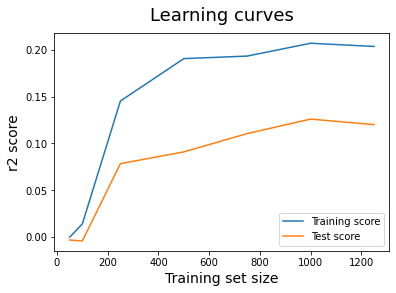

In [148]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = model_1,
                                                              X = X_train,
                                                              y = y_train,
                                                              train_sizes = [50,100,250,500,750,1000,1250],
                                                              cv = 10,
                                                              scoring = 'r2')
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

# knn 

In [1]:
X_train,X_test,y_train,y_test=train_test_split(X_features,y,train_size=0.8)

NameError: name 'train_test_split' is not defined

In [465]:
r_scaler = MinMaxScaler()
r_scaler.fit(X_features)
X_scaled=r_scaler.transform(X_features)



In [466]:


X_scaled = pd.DataFrame(data=X_scaled)
cols=[]
for i in new_df.columns:
    if i in  X_features.columns:
        
        cols.append(i)
X_scaled.columns=cols


In [467]:
knn=KNeighborsRegressor(n_neighbors=15)

In [475]:
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [477]:
predictions=cross_val_predict(knn,X_scaled,y,cv=5)

In [478]:
predictions

array([2.46666671, 2.28888889, 2.33333333, ..., 2.80000002, 2.17777773,
       2.82222224])

In [481]:
knn.fit(X_scaled,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [ ]:
y_pred=knn.predict(X_scaled)



In [ ]:
knn.score(X_test,y_test)

# SGD REGRESSOR

In [112]:
new_df['SLON3_avg']

16155    3.333333
39793    2.666667
73123    3.000000
82217    2.666667
2388     1.333333
           ...   
13236    4.333333
51064    1.666667
53712    3.666667
25729    4.000000
77317    1.666667
Name: SLON3_avg, Length: 45489, dtype: float64

In [451]:
X_features = new_df[['BFF_15_1', 'BFF_15_2', 'BFF_15_3', 'BFF_15_4', 'BFF_15_5', 'BFF_15_6',
       'BFF_15_7', 'BFF_15_8', 'BFF_15_9', 'BFF_15_10', 'BFF_15_14',
       'BFF_15_15', 'Dem_age', 'Dem_edu', 'Dem_riskgroup', 'Female', 'Male',
       'Other', 'Married/cohabiting', 'Other or would rather not say',
       'Single', 'Uninformative response', 'Isolated',
       'Life carries on as usual', 'Life carries on with minor changes',
       'Full time employed', 'Not employed', 'Retired','neu','ext','ope','agr','con'
]].reset_index(drop=True)

In [452]:
y=new_df['SLON3_avg']

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X_features,y,train_size=0.8)

In [107]:
r_scaler = MinMaxScaler()
r_scaler.fit(X_train)
X_train=r_scaler.transform(X_train)

In [108]:
# scaling


X_train = pd.DataFrame(data=X_train)
cols=[]
for i in new_df.columns:
    if i in  X_features.columns:
        
        cols.append(i)
X_train.columns=cols

In [109]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDRegressor

# Squared loss SGD Regressor
sgd_model = SGDRegressor(loss="squared_loss")

# Cross Validate Model
sgd_model_cv = cross_validate(sgd_model, 
                              X_train, 
                              y_train,
                              cv = 10, 
                              scoring = ['r2','max_error'] )

In [110]:
r2 = sgd_model_cv['test_r2'].mean()
r2

0.1493178234191739

In [111]:
max_error = abs(sgd_model_cv['test_max_error']).max()
max_error

3.2268903589182676

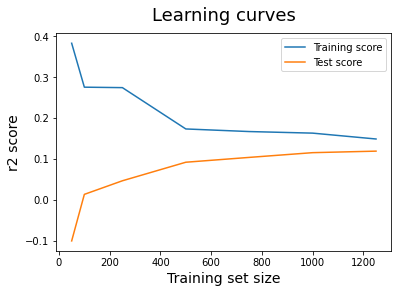

In [458]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = SGDRegressor(loss="squared_loss"),
                                                              X = X_scaled, 
                                                              y = y, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

# Linear 

In [221]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# Squared loss SGD Regressor
logistic_model = LinearRegression()

# Cross Validate Model
sgd_model_cv = cross_validate(logistic_model, 
                              X_scaled, 
                              y,
                              cv = 10, 
                              scoring = ['r2','max_error'] )

In [224]:
r2 = sgd_model_cv['test_r2'].mean()
r2

0.9999999999999902

In [225]:
max_error = abs(sgd_model_cv['test_max_error']).max()
max_error

4.894923608667057e-07

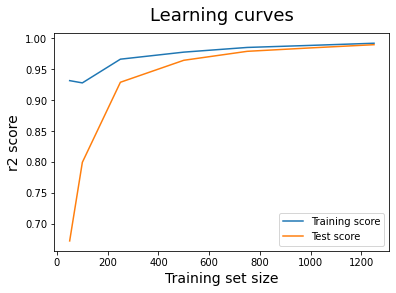

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = SGDRegressor(loss="squared_loss"),
                                                              X = X_scaled, 
                                                              y = y, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [ ]:
########## REcommendation

In [630]:
new_df.loc[:,'Expl_Coping_2':'Expl_Coping_16']

,Expl_Coping_2,Expl_Coping_3,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16
0,1,1,1,0,0,0,0,1,0,0,1,1,1,0
1,0,1,1,0,0,0,1,0,1,1,0,1,1,1
2,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,1,0,0,1,1,1,1,0,1,0,0,0,0,0
4,0,1,1,1,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85484,1,0,0,0,0,0,1,0,0,0,1,0,0,1
85485,1,1,1,1,0,1,1,0,0,0,0,1,0,0
85486,0,0,0,0,1,0,0,1,1,0,0,0,0,0
85487,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [599]:
rec=new_df.copy()

In [600]:
unfiltered_data['Expl_Coping_1'].value_counts()

4.0    33677
5.0    22901
3.0     9679
2.0     7631
6.0     6380
1.0     5221
Name: Expl_Coping_1, dtype: int64

In [628]:

check_cond=lambda x : 1 if x >= 5  else 0
check_cond(12)
  

1

In [629]:
for item in new_df.loc[:,'Expl_Coping_1':'Expl_Coping_16']:
    
    new_df[item]=new_df[item].map(check_cond)

In [623]:
#new_df['Expl_Coping_1']=new_df['Expl_Coping_1'].map(check_cond)

# TRYING KNN METHOD


In [650]:
# from algorithm

In [655]:
X=new_df[['OECD_insititutions_1', 'OECD_insititutions_2', 'OECD_insititutions_3',
       'OECD_insititutions_4', 'OECD_insititutions_6', 'Trust_countrymeasure',
       'Expl_Distress_5', 'Expl_Distress_6', 'Expl_Distress_10',
       'Expl_Distress_11', 'Expl_Distress_12', 'Expl_Distress_13',
       'Expl_Distress_14', 'Expl_Distress_16', 'Expl_Distress_18',
       'Expl_Distress_19', 'Expl_Distress_21', 'Expl_Distress_22',
       'Expl_Distress_23', 'Expl_media_1']]

In [ ]:
# from what veronica said 

In [631]:
#X=new_df[["Dem_age","Dem_edu","Dem_riskgroup",'Female','Male','Other','Divorced/widowed','Married/cohabiting','Other or would rather not say','Single','Uninformative response','no opinion','Isolated','Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes','Full time employed','Not employed','Part time employed','Retired','Self-employed',
#'neu','ext','ope','agr','con','OECD_insititutions_1','OECD_insititutions_2','OECD_insititutions_3','OECD_insititutions_4','OECD_insititutions_5','OECD_insititutions_6','Expl_media_1','SPS_1','SPS_2','SPS_3','SPS_4','SPS_5','SPS_6','SPS_7','SPS_8','SPS_9','SPS_10']]

In [656]:
y=new_df.loc[:,'Expl_Coping_1':'Expl_Coping_16']


In [331]:
#y=rec.loc[:,'Expl_Coping_1':'Expl_Coping_16']

#r_scaler_sps=RobustScaler()
#r_scaler_sps.fit(X_train[['SPS_avg']])
#X_train['SPS_avg']=r_scaler_sps.transform(X_train[['SPS_avg']])



In [332]:
#r_scaler_knn = MinMaxScaler()
#r_scaler_knn.fit(X_train)
#X_train[['neu','ext','ope','agr','con','OECD_insititutions_1','OECD_insititutions_2','OECD_insititutions_3','OECD_insititutions_4','OECD_insititutions_5','OECD_insititutions_6','Expl_media_1',
#'SPS_avg']]=r_scaler.transform(X_train)

In [657]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [658]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled=scaler.transform(X_train)

In [659]:
df_X = pd.DataFrame(data=X_scaled)
df_X.columns = X.columns

In [660]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)



In [661]:
mean_squared_error(y_test,y_pred)

0.31294498381877023

In [662]:
knn.score(X_test,y_test)

0.08913323195695402

In [ ]:
##############################

In [646]:
mean_squared_error(y_test,y_pred)

0.3035052832689983

In [647]:
knn.score(X_test,y_test)

0.1156860451514797

# LOGISTIC MODEL:

In [463]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [464]:
X=new_df[["Dem_age","Dem_edu","Dem_riskgroup",'Female','Male','Other','Divorced/widowed','Married/cohabiting','Other or would rather not say','Single','Uninformative response','no opinion','Isolated','Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes','Full time employed','Not employed','Part time employed','Retired','Self-employed',
'neu','ext','ope','agr','con','OECD_insititutions_1','OECD_insititutions_2','OECD_insititutions_3','OECD_insititutions_4','OECD_insititutions_5','OECD_insititutions_6','Expl_media_1','SPS_1','SPS_2','SPS_3','SPS_4','SPS_5','SPS_6','SPS_7','SPS_8','SPS_9','SPS_10']]
#X=new_df[['neu','ext','ope','agr','con','OECD_insititutions_1','OECD_insititutions_2','OECD_insititutions_3','OECD_insititutions_4','OECD_insititutions_5','OECD_insititutions_6','Expl_media_1','SPS_1','SPS_2','SPS_3','SPS_4','SPS_5','SPS_6','SPS_7','SPS_8','SPS_9','SPS_10']]

In [465]:
y=new_df.loc[:,'Expl_Coping_1':'Expl_Coping_16']

In [502]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [479]:
X.columns

Index(['Dem_age', 'Dem_edu', 'Dem_riskgroup', 'Female', 'Male', 'Other',
       'Divorced/widowed', 'Married/cohabiting',
       'Other or would rather not say', 'Single', 'Uninformative response',
       'no opinion', 'Isolated',
       'Isolated in medical facility of similar location',
       'Life carries on as usual', 'Life carries on with minor changes',
       'Full time employed', 'Not employed', 'Part time employed', 'Retired',
       'Self-employed', 'neu', 'ext', 'ope', 'agr', 'con',
       'OECD_insititutions_1', 'OECD_insititutions_2', 'OECD_insititutions_3',
       'OECD_insititutions_4', 'OECD_insititutions_5', 'OECD_insititutions_6',
       'Expl_media_1', 'SPS_1', 'SPS_2', 'SPS_3', 'SPS_4', 'SPS_5', 'SPS_6',
       'SPS_7', 'SPS_8', 'SPS_9', 'SPS_10'],
      dtype='object')

In [503]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled=scaler.transform(X_train)


In [504]:
df_X = pd.DataFrame(data=X_scaled)
df_X.columns = X.columns

In [506]:
df_X.shape

(68391, 43)

In [507]:
y_train.shape

(68391, 15)

In [444]:
model=LogisticRegression(max_iter=10000,solver='liblinear')

In [407]:
#results=cross_val_score(model,X_scaled,y['Expl_Coping_1'],cv=5).mean()

In [477]:
model.fit(X_scaled,y_train['Expl_Coping_1'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [478]:
import numpy as np
from sklearn.inspection import permutation_importance



permutation_score = permutation_importance(model, X_scaled, y_train['Expl_Coping_1'], n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X_scaled.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance']

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [381]:
#for target in y.columns:
#    print(y[target])

In [394]:
new_df.columns

Index(['Dem_age', 'Dem_edu', 'Dem_edu_mom', 'Dem_Expat', 'Dem_dependents',
       'Dem_riskgroup', 'Scale_PSS10_UCLA_1', 'Scale_PSS10_UCLA_2',
       'Scale_PSS10_UCLA_3', 'Scale_PSS10_UCLA_4',
       ...
       'Not employed', 'Part time employed', 'Retired', 'Self-employed',
       'Student', 'neu_pred', 'ext_pred', 'ope_pred', 'agr_pred', 'con_pred'],
      dtype='object', length=141)

In [483]:
targets=[]
scores=[]
predicts=[]
for target in y.columns:
    
    model=LogisticRegression(max_iter=1000)
    
    score=cross_val_score(model,X_scaled,y[target],cv=5).mean()
    
    scores.append(score)
    targets.append(target)
    
    #model.fit(X_scaled,y[target])
    
    #predict=model.predict(X_scaled)
    #predicts.append(predict)
    


ValueError: Found input variables with inconsistent numbers of samples: [68391, 85489]

In [485]:
print(targets)

[]


In [ ]:
#  1.  define features
#target_name=[]
#score=[]
# 2. make a loop for target in list of targets
             3. cross validation inside teh loop 
            

# new way to do this : idk how tho

In [ ]:
r_scaler = MinMaxScaler()
r_scaler.fit(new_df)
new_df_np=r_scaler.transform(new_df)
df = pd.DataFrame(data=new_df_np)
df.columns = new_df.columns

cols=[]
for i in y.columns:
    cols.append(i)


df=df.drop(columns=[cols])

In [511]:
import sklearn.feature_selection
select=sklearn.feature_selection.SelectKBest(k=20)
selected_features=select.fit(df_X,y_train['Expl_Coping_1'])
indices_selected=selected_features.get_support(indices=True)
colnames_selected=[df_X.columns[i] for i in indices_selected]

X_train_selected=df_X[colnames_selected]
X_test_selected=X_test[colnames_selected]

X_train_selected

,Dem_age,agr,con,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Expl_media_1,SPS_1,SPS_2,SPS_3,SPS_4,SPS_5,SPS_6,SPS_7,SPS_8,SPS_9,SPS_10
0,0.315217,0.733333,0.933333,0.3,0.6,0.8,0.8,0.7,0.8,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.478261,0.866667,0.866667,0.6,0.5,0.6,0.5,0.6,0.7,1.0,1.0,0.8,1.0,1.0,1.0,0.6,0.8,1.0,0.6,1.0
2,0.304348,0.600000,0.666667,0.6,0.8,0.6,0.8,0.6,0.8,0.0,0.6,0.8,0.2,0.2,1.0,0.2,1.0,1.0,0.8,0.6
3,0.065217,0.666667,0.666667,0.0,0.0,0.0,0.3,0.2,0.0,0.8,1.0,0.8,1.0,1.0,1.0,1.0,0.8,1.0,0.8,1.0
4,0.086957,0.800000,0.866667,0.8,0.1,0.5,0.4,0.4,0.8,0.0,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68386,0.282609,0.733333,0.533333,0.0,0.3,0.5,0.5,0.4,0.1,0.6,0.8,0.8,0.8,1.0,0.8,0.6,0.4,1.0,0.6,0.8
68387,0.282609,0.800000,0.800000,0.8,0.2,0.3,0.5,0.7,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.6,0.8
68388,0.326087,0.600000,0.466667,0.3,0.5,0.4,0.8,0.5,0.4,0.4,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.4
68389,0.130435,0.866667,0.533333,0.9,0.4,0.8,1.0,0.8,0.9,1.0,1.0,0.8,0.8,0.8,1.0,0.8,1.0,0.2,0.8,1.0


In [563]:
X_train,X_test,y_train,y_test=train_test_split(df,y['Expl_Coping_1'],train_size=0.8)

In [564]:
X_train.shape


(68391, 126)

In [565]:
y_train.shape

(68391,)

In [554]:
import sklearn.feature_selection
select=sklearn.feature_selection.SelectKBest(k=20)
selected_features=select.fit(X_train,y_train)
indices_selected=selected_features.get_support(indices=True)
colnames_selected=[df.columns[i] for i in indices_selected]

X_train_selected=X_train[colnames_selected]
X_test_selected=X_test[colnames_selected]


In [557]:
X_train_selected.columns

Index(['OECD_insititutions_1', 'OECD_insititutions_2', 'OECD_insititutions_3',
       'OECD_insititutions_4', 'OECD_insititutions_6', 'Trust_countrymeasure',
       'Expl_Distress_5', 'Expl_Distress_6', 'Expl_Distress_10',
       'Expl_Distress_11', 'Expl_Distress_12', 'Expl_Distress_13',
       'Expl_Distress_14', 'Expl_Distress_16', 'Expl_Distress_18',
       'Expl_Distress_19', 'Expl_Distress_21', 'Expl_Distress_22',
       'Expl_Distress_23', 'Expl_media_1'],
      dtype='object')

In [559]:
X_train.shape

(68391, 126)

In [562]:
y_train

75233    4.0
61580    2.0
29016    2.0
76424    2.0
17937    5.0
        ... 
22644    6.0
35308    4.0
76159    6.0
67065    3.0
4248     3.0
Name: Expl_Coping_1, Length: 68391, dtype: float64

In [570]:
model=LogisticRegression(max_iter=10000,solver='liblinear')
score=cross_val_score(model,X_train,y_train,cv=5).mean()


In [571]:
score

0.4885437477467428

# svc

In [ ]:
from sklearn.svm import SVC

svc=S